<a href="https://colab.research.google.com/github/GEJ1/web-scraping-python/blob/main/web_scraping_maestria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web scraping con Python**


#### *Material complementario a la clase dictada por [Gustavo Juantorena](https://github.com/GEJ1) como docente invitado en la materia <b>Text Mining</b> de la  [Maestría en Explotación de Datos y Descubrimiento de Conocimiento](http://datamining.dc.uba.ar/datamining/) de la Universidad de Buenos Aires.*
#### [Slides de la clase](https://docs.google.com/presentation/d/10-lc2Y6kMVHp7FO9v8ReZdY1MPwUlgxWIsSDePY0afg/edit?usp=sharing)

*Las partes del código que no son mias tienen las atribuciones correspondientes*

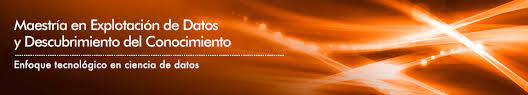

### **Importante**: Los cambios que hagan en este cuaderno de Colab no se guardarán, lo ideal sería que hagan una copia del mismo en sus respectivos Google Drives de la siguiente forma:

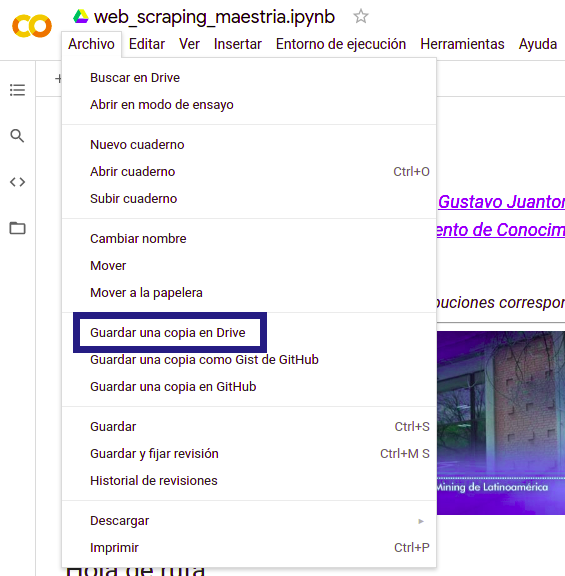

# **Hoja de ruta**


## 1. Pedidos HTTP con **urllib** y **Requests**
## 2. Uso basico de **APIs**
## 3. Parseo con **Beautiful Soup**






# **Pedidos HTTP con urllib y Requests**

In [1]:
# Para hacer pedidos mediante el protocolo HTTP
import requests

In [2]:
# Hacemos un pedido a la página de wikipedia
URL = 'https://www.wikipedia.org'

# Guardamos el objeto que nos devuelve
response = requests.get(URL)

print(f'Tipo de Objeto: {type(response)} \n')
print(f'Status code: {response.status_code} \n')
print(f'Data: {response.content} \n')

Tipo de Objeto: <class 'requests.models.Response'> 

Status code: 200 

Data: b'<!DOCTYPE html>\n<html lang="en" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<meta name="viewport" content="initial-scale=1,user-scalable=yes">\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">\n<link rel="license" href="//creativecommons.org/licenses/by-sa/4.0/">\n<style>\n.sprite{background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-8bb90067.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_si

## También podemos usar la libreria Requests

### Ejemplo de scrapeo de imágenes

In [3]:
# Importamos
import requests

# defino la URL
image_url = 'https://i.pinimg.com/564x/37/be/0a/37be0afe05a46e4c45bdcb443032b3fa.jpg'

# Hago una peticion y guardo la respuesta
image_response = requests.get(image_url)

# Accedemos al contenido de la imagen en bytes
image_response_content = image_response.content

print(f'Este es el contenido en bytes: \n {image_response_content}')

Este es el contenido en bytes: 
 b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x01\x90\x02&\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x04\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x04\x05\x02\x06\x07\x08\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xd4\xc0\xe7\x10PB3:\xb3\xc8\xf8I(\x82\x13\x92\x11d\xf2\x02D\xf5\x80\x13\x882i\xe4\x83\x94M\x15\x91\xe4\x80U\x81\x05\x0b\x02\xbdbr\xd7\xadX\x15\xe9\x16+\x02U:\x10\x0b\x12\xb8,H!8i\x88\x94B\xc1lR\xbc[\x02\xb8K\x02\x0c\xa8\xcc\xc6\n\xcfH%MD\

Esta imagen la bajamos de internet usando Python! 
 


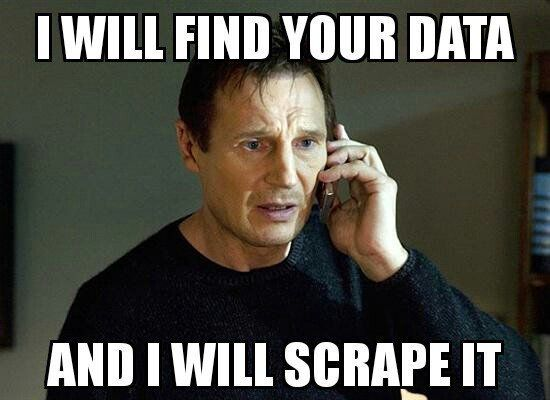

In [4]:
# Importamos librerias para manejar imagenes (no tienen nada que ver con el scrapeo)
from PIL import Image
from io import BytesIO

# Mostramos la imagen
image_from_url = Image.open(BytesIO(image_response_content))
print('Esta imagen la bajamos de internet usando Python! \n ')
image_from_url

In [5]:
# Para guardarla
image_from_url.save("imagen.png","PNG")

### Headers

breve comentario, puede llegar a ser útil

In [6]:
# Una serie de datos que acompanan al pedido. Para saber mas: https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers

url = 'https://exactas.uba.ar/'

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0' # User-Agent da info del sistema operativo, el navegador usado, etc
    }
response = requests.get(url, headers=headers)

# **Uso basico de APIs**

### Uso de API de manera directa

[Sunset and sunrise times API](https://sunrise-sunset.org/api)

**Sirve para obtener la hora del amanecer y el ocaso de un determinado día**

*Parametetros:*


*  **lat** (float): Latitude in decimal degrees. Required.
*  **lng** (float): Longitude in decimal degrees. Required.
*  **date** (string): Date in YYYY-MM-DD format. Also accepts other date formats   and even relative date formats. If not present, date defaults to current date. Optional.
* **callback** (string): Callback function name for JSONP response. Optional.
* **formatted** (integer): 0 or 1 (1 is default). Time values in response will be expressed following ISO 8601 and day_length will be expressed in seconds. Optional.

*Estructura de la query:*

`https://api.sunrise-sunset.org/json?`

`lat=36.7201600`

`&`

`lng=-4.4203400`

`&`

`date=2021-07-26`

In [7]:
# Definimos los parametros de nuestra query
latitud = -34.6
longitud = -58.4
fecha = '1912-12-23' # YYYY-MM-DD

In [8]:
# Hacemos el pedido y guardamos la respuesta en una nueva variable
response_sunset = requests.get(f'https://api.sunrise-sunset.org/json?lat={latitud}&lng={longitud}&date={fecha}', verify=False)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.sunrise-sunset.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [9]:
# Para des-serializar el objeto (que era tipo 'HTTPResponse') y cargarlo como json
data_sunset = response_sunset.json()
data_sunset

{'results': {'sunrise': '8:37:04 AM',
  'sunset': '11:08:37 PM',
  'solar_noon': '3:52:50 PM',
  'day_length': '14:31:33',
  'civil_twilight_begin': '8:09:03 AM',
  'civil_twilight_end': '11:36:38 PM',
  'nautical_twilight_begin': '7:32:36 AM',
  'nautical_twilight_end': '12:13:05 AM',
  'astronomical_twilight_begin': '6:52:27 AM',
  'astronomical_twilight_end': '12:53:14 AM'},
 'status': 'OK'}

In [10]:
#Evaluamos el status del pedido
sunset_status = data_sunset['status']
print(f'Status: {sunset_status} \n')

Status: OK 



In [11]:
# Podemos ver su contenido como si fuera un diccionario:
sunset = data_sunset['results']['sunset']
print(f'El {fecha} el sol se puso a las {sunset} (UTC)\n')

El 1912-12-23 el sol se puso a las 11:08:37 PM (UTC)



In [12]:
# tambien podriamos iterar
print("Iterando data_sunset['results']: \n")
for elemento in data_sunset['results']:
  print(elemento)

Iterando data_sunset['results']: 

sunrise
sunset
solar_noon
day_length
civil_twilight_begin
civil_twilight_end
nautical_twilight_begin
nautical_twilight_end
astronomical_twilight_begin
astronomical_twilight_end


### Uso de API por medio de una librería: Wikipedia

Wikipedia-API es un wrapper de Python fácil de usar para la API de Wikipedia. Admite la extracción de textos, secciones, enlaces, categorías, traducciones, etc.

Repositorio: https://github.com/martin-majlis/Wikipedia-API

Documentación: https://wikipedia-api.readthedocs.io/en/latest/README.html






In [13]:
# Instalamos el paquete porque no viene con Colab
!pip3 install wikipedia-api -q

In [14]:
# Ahora si podemos importarlo
import wikipediaapi

In [15]:
# Instanciamos la clase wikipediaapi y utilizamos el metodo Wikipedia con el parametro de idioma
user_agent = 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
wiki_wiki = wikipediaapi.Wikipedia(language='es', user_agent=user_agent)

# Usamos el metodo page para y hacemos un pedido con una keyword
page_data_mining = wiki_wiki.page('Minería_de_datos')

print(f'page_data_mining es un objeto de tipo: {type(page_data_mining)}')

page_data_mining es un objeto de tipo: <class 'wikipediaapi.WikipediaPage'>


In [16]:
# Resumen
page_data_mining.summary

'La minería de datos o exploración de datos (es la etapa de análisis de "knowledge discovery in databases" o KDD) es un campo de la estadística y las ciencias de la computación referido al proceso que intenta descubrir patrones en grandes volúmenes de conjuntos de datos.[1]\u200b[2]\u200b  Utiliza los métodos de la inteligencia artificial, aprendizaje automático, estadística y sistemas de bases de datos. El objetivo general del proceso de minería de datos consiste en extraer información de un conjunto de datos y transformarla en una estructura comprensible para su uso posterior. Además de la etapa de análisis en bruto, supone aspectos de gestión de datos y de bases de datos, de procesamiento de datos, del modelo y de las consideraciones de inferencia, de métricas de intereses, de consideraciones de la teoría de la complejidad computacional, de post-procesamiento de las estructuras descubiertas, de la visualización y de la actualización en línea.\nEl término es un concepto de moda, y es

In [17]:
# Url completa
page_data_mining.fullurl

'https://es.wikipedia.org/wiki/Miner%C3%ADa_de_datos'

In [18]:
# Imprimir las categorias a las que corresponde la pagina con el atributo 'categories'

categories = page_data_mining.categories
for title in sorted(categories.keys()):
    print(title, categories[title])

Categoría:Análisis de datos Categoría:Análisis de datos (id: ??, ns: 14)
Categoría:Bases de datos Categoría:Bases de datos (id: ??, ns: 14)
Categoría:Minería de datos Categoría:Minería de datos (id: ??, ns: 14)
Categoría:Wikipedia:Artículos con identificadores GND Categoría:Wikipedia:Artículos con identificadores GND (id: ??, ns: 14)
Categoría:Wikipedia:Artículos con identificadores LCCN Categoría:Wikipedia:Artículos con identificadores LCCN (id: ??, ns: 14)
Categoría:Wikipedia:Artículos que necesitan referencias adicionales Categoría:Wikipedia:Artículos que necesitan referencias adicionales (id: ??, ns: 14)
Categoría:Wikipedia:Páginas con enlaces mágicos de ISBN Categoría:Wikipedia:Páginas con enlaces mágicos de ISBN (id: ??, ns: 14)
Categoría:Wikipedia:Referenciar (aún sin clasificar) Categoría:Wikipedia:Referenciar (aún sin clasificar) (id: ??, ns: 14)


# **BeautifulSoup**

## Generalidades

In [19]:
from bs4 import BeautifulSoup
import requests

# Vamos a jugar un poco con la pagina de Exactas
url_base = 'https://exactas.uba.ar/'
endpoint_calendario = 'calendario-academico/'
html_obtenido = requests.get(url_base+endpoint_calendario)
soup = BeautifulSoup(html_obtenido.text, "html.parser")
print(type(soup))
print(soup)
print(soup.prettify())

<class 'bs4.BeautifulSoup'>
<!DOCTYPE html>

<html lang="es" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#">
<head>
<meta charset="utf-8"/>
<title>Calendario Académico | Facultad de Ciencias Exactas y Naturales de la Universidad de Buenos Aires</title>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<link href="https://exactas.uba.ar/xmlrpc.php" rel="pingback"/>
<link href="https://exactas.uba.ar/wp-content/uploads/2022/08/favicon.png" rel="shortcut icon" type="image/gif"><link href="https://fonts.googleapis.com/css?family=Raleway:400,700|Roboto+Condensed|Roboto+Slab:300,400,700" rel="stylesheet"/>
<!-- Mobile Specific Metas 
================================================== -->
<meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport">
<meta content="max-image-preview:large" name="robots"/>
<!-- Meta Tag Manager -->
<meta content="606d3862f16c3d65cdd1f023c055ca59" name="WAS"/>
<!-- / Meta Tag Manager -->
<link href="//static.a

In [20]:
# Si queremos quedarnos con un tag
# El método "find" busca el primer elemento de la pagina con ese tag
primer_h3 = soup.find('h3')
# print(primer_h3)

# equivalente a:
print(soup.h3.text)

INSCRIPCIÓN PRIMER CUATRIMESTRE 2023


In [21]:
# El método "find_all" busca TODOS los elementos de la pagina con ese tag y devuelve una lista que los contiene (en realidad devuelve un objeto de la clase "bs4.element.ResultSet")
h3_todos = soup.find_all('h3')
# print(h3_todos)

# Si usamos el parametro limit = 1, emulamos al metodo find:
h3_uno_solo = soup.find_all('h3',limit=1)
print(h3_uno_solo)

[<h3>INSCRIPCIÓN PRIMER CUATRIMESTRE 2023</h3>]


In [22]:
# podemos iterar sobre el objeto
for fecha in h3_todos[:-1]:
  # Extraemos el texto que se encuentra dentro del tag
  print(fecha.text)

INSCRIPCIÓN PRIMER CUATRIMESTRE 2023
EXÁMENES DE FEBRERO-MARZO 2023
PRIMER BIMESTRE 2023 (8 semanas)
SEGUNDO BIMESTRE 2023 (8 semanas)
INSCRIPCIÓN SEGUNDO CUATRIMESTRE 2023
INSCRIPCIÓN A DOCTORADO 2023
SEMANAS DE LAS CIENCIAS 2023
ACTOS DE COLACIÓN DE GRADO Y POSGRADO 2023
FERIADOS


In [23]:
# Busco por clase, escribo class_ porque "class" es una palabra reservada en Python
eventos_proximos = soup.find('aside', class_ = 'widget_my_calendar_upcoming_widget')
for evento in eventos_proximos:
  print(evento.text)

Agenda →

24 agosto, 2023, 14.00: Charla de la Lic. en Ciencias de la Computación  | + INFO
25 agosto, 2023,  : Finaliza Aniversario del IFIBYNE  | + INFO
29 agosto, 2023, 13.00: Coloquio DCAO/CIMA, con Juan Cruz González Allonca  | + INFO
29 agosto, 2023, 14.00: Charla de la Lic. en Ciencias Matemáticas  | + INFO
31 agosto, 2023,  : Finaliza la inscripción abierta para las Becas Progresar  | + INFO
31 agosto, 2023, 14.00: Charla de la Lic. en Ciencias Químicas  | + INFO



In [24]:
# Todos los links. Esto podría ser útil para seguir scrapeando todo el sitio haciendo requests en ellos
a_todos = soup.find_all('a', href=True)
for a in a_todos:
  print(f"{a.text}: {a['href']}")

Conocé Exactas: https://exactas.uba.ar/institucional/la-facultad/
Carreras de Grado: https://exactas.uba.ar/ensenanza/carreras-de-grado/
Carreras de Posgrado: https://exactas.uba.ar/ensenanza/carreras-de-posgrado/
Cursos de Posgrado: https://exactas.uba.ar/ensenanza/cursos-de-posgrado/
Estudiantes Internacionales: https://exactas.uba.ar/informacion-para-estudiantes-internacionales/
Orientación Vocacional: https://exactas.uba.ar/extension/ov/
Becas para estudio: https://exactas.uba.ar/becas-para-estudio/
Carreras de Grado: https://exactas.uba.ar/ensenanza/carreras-de-grado/
Calendario Académico: https://exactas.uba.ar/calendario-academico/
Inscripción de ingresantes: https://exactas.uba.ar/inscripcion-ingresantes/
Programa de Ingresantes: https://ingresantes.exactas.uba.ar/
Inscripción a materias: http://inscripciones.exactas.uba.ar/exactas/
Becas para estudio: https://exactas.uba.ar/becas-para-estudio/
Becas de Investigación: https://exactas.uba.ar/becas-de-investigacion/
Distribución 

In [25]:
# Podemos tambien scrapear un tabla y traernos los feriados
tabla_feriados = soup.find_all('td')

# Con 'attr' podemos acceder a cualquier atributo de a etiqueta usando un diccionario
dias = soup.find_all('td', attrs={'style':"width: 8.88383%;height: 56px"})
fechas = soup.find_all('td', attrs={'style':"width: 14.8064%;height: 56px"})
eventos = soup.find_all('td', attrs={'style':"width: 48.6333%;height: 56px"})

for pos in range(len(dias)):
  print(f" Dia: {dias[pos].text.strip():<20} | fecha: {fechas[pos].text.strip():<20} | evento: {eventos[pos].text.strip():<20} ")

 Dia: Domingo              | fecha: 1 de enero           | evento: Año Nuevo            
 Dia: Lunes                | fecha: 20 de febrero        | evento: Carnaval             
 Dia: Martes               | fecha: 21 de febrero        | evento: Carnaval             
 Dia: Viernes              | fecha: 24 de marzo          | evento: Día Nacional de la Memoria por la Verdad y la Justicia 
 Dia: Jueves               | fecha: 6 de abril           | evento: Jueves Santo         
 Dia: Jueves               | fecha: 6 de abril           | evento: Pascua Judía (Pesaj) 
 Dia: Lunes                | fecha: 24 de abril          | evento: Día de Acción por la Tolerancia y el Respeto entre los Pueblos 
 Dia: Viernes              | fecha: 26 de mayo           | evento: Feriado con fines turísticos 
 Dia: Sábado               | fecha: 17 de junio          | evento: Paso a la Inmortalidad del General Güemes 
 Dia: Martes               | fecha: 20 de junio          | evento: Paso a la Inmortalidad del 

<font color='red'>Ejercitación:</font>

* Generar diccionario cuyas claves sean los nombres de las carreras de posgrado vigentes en Exactas y sus valores el link asociado a cada una de ellas. https://exactas.uba.ar/ensenanza/carreras-de-posgrado/

**¡A trabajar!**

<img src="https://img.icons8.com/ios/452/spade.png" width="80" height="auto"/>


In [26]:
# Espacio para resolver el ejercicio





In [27]:
#@title Resolución

# Obtenemos la información
url_base = 'https://exactas.uba.ar/'
endpoint_grado = '/ensenanza/carreras-de-grado/'
html_obtenido = requests.get(url_base + endpoint_grado)
soup = BeautifulSoup(html_obtenido.text, "html.parser")

# La parseamos
ul = soup.find('ul', class_ = "listado carreras grado")
carreras = {li.h2.text : li.a['href'] for li in ul if li != '\n'}
carreras

{'Ciencias Biológicas': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-biologicas/',
 'Ciencias de Datos': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-de-datos/',
 'Ciencias de la Atmósfera': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-de-la-atmosfera/',
 'Ciencias de la Computación': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-de-la-computacion/',
 'Ciencias Físicas': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-fisicas/',
 'Ciencias Geológicas': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-geologicas/',
 'Ciencias Matemáticas': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-matematicas/',
 'Ciencias Químicas': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-quimicas/',
 'Ciencia y Tecnología de Alimentos': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencia-y-tecnologia-de-alimentos/',
 'Oceanografía': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/

## **Vamos a scrapear las novedades de Goodreads.com**
<hr>
<img src='https://digital.hbs.edu/platform-digit/wp-content/uploads/sites/2/2015/10/goodreads-620x200.png'>


In [28]:
from bs4 import BeautifulSoup
import requests
import json
import time
import re
import pandas as pd

def goodreads_scraper(base_url, url_category):
  '''
  Scraper de libros de resumenes de libros que aparecen como 'New realeases' en GoodReads

  parameters:
  -------------------------------------------------------------------------------------------------------------------------
            url_category  - String conteniendo una URL del tipo ' https://www.goodreads.com/genres/new_releases/{CATEGORIA} '
            base_url - String conteniendo la URL base de Goodreads. Actualmente: 'https://www.goodreads.com'

  return:
  -------------------------------------------------------------------------------------------------------------------------
            titulos       - Lista de strings con los titulos de los libros correspondientes a la categoria
            resumenes     - Lista de strings con los resumenes de los libros correspondientes a la categoria
            df            - Pandas Dataframe cuyos índices son los títulos de los libros y cuya única columna contiene los resúmenes

  '''

  # Inicializo
  resumenes = []

  # Pedido a la URL con todos los libros
  req_general = requests.get(url_category)
  print(f"URL de categoria: {url_category} \nStatus code: {req_general.status_code}")

  #Parseo instanciando un objeto de BeautifulSoup
  soup_general = BeautifulSoup(req_general.text, "html.parser")

  # Busco los div de cada libro
  paging = soup_general.find_all("div",{'class':'coverWrapper'})

  # Extraigo titulos
  titulos = [img['alt'] for img in soup_general.find_all('img', alt=True, class_='bookImage')]

  for i in range(len(paging)):
    # Busco los links a cada libro de la categoria
    paging_link = paging[i].find_all('a', href=True)
    book_id = paging_link[0]['href']

    # Pedido a la URL de un libro especifico
    req_book = requests.get(base_url+str(book_id))
    print(f"URL de libro: {base_url+str(book_id)} \nStatus code: {req_book.status_code}")

    # Parseo
    soup_book = BeautifulSoup(req_book.text, "html.parser")

    # Resumenes
    for i in soup_book.find_all("div", class_='DetailsLayoutRightParagraph__widthConstrained'):
      resumenes.append(i.span.text.strip())
    # Armo diccionario con clave = titulo y valor = resumen
    diccionario_resumenes = dict(zip(titulos,resumenes))

    # Armo un Pandas Dataframe en base al diccionario
    df = pd.DataFrame(diccionario_resumenes, index=['Resumenes']).T


  return titulos, resumenes, df

# Documentacion
help(goodreads_scraper)


Help on function goodreads_scraper in module __main__:

goodreads_scraper(base_url, url_category)
    Scraper de libros de resumenes de libros que aparecen como 'New realeases' en GoodReads
    
    parameters:
    -------------------------------------------------------------------------------------------------------------------------
              url_category  - String conteniendo una URL del tipo ' https://www.goodreads.com/genres/new_releases/{CATEGORIA} '
              base_url - String conteniendo la URL base de Goodreads. Actualmente: 'https://www.goodreads.com'
    
    return:
    -------------------------------------------------------------------------------------------------------------------------
              titulos       - Lista de strings con los titulos de los libros correspondientes a la categoria
              resumenes     - Lista de strings con los resumenes de los libros correspondientes a la categoria
              df            - Pandas Dataframe cuyos índices 

In [29]:
category = 'Biography'
url_category = f'https://www.goodreads.com/genres/new_releases/{category}'
base_url = 'https://www.goodreads.com'

# Para saber cuanto tarda
t1 = time.perf_counter()

# Corro la funcion
titulos, resumenes, df = goodreads_scraper(base_url, url_category)

# Para saber cuanto tarda
t2 = time.perf_counter()

print('Tiempo de ejecución:',t2-t1)

URL de categoria: https://www.goodreads.com/genres/new_releases/Biography 
Status code: 200
['Owner of a Lonely Heart: A Memoir', "Everybody's Favorite: Tales from the World's Worst Perfectionist", "Wifedom: Mrs. Orwell's Invisible Life", 'First to the Front: The Untold Story of Dickey Chapelle, Trailblazing Female War Correspondent', 'President Garfield: From Radical to Unifier', "Lexington: The Extraordinary Life and Turbulent Times of America's Legendary Racehorse", 'Contradiction Days: An Artist on the Verge of Motherhood', 'Into the Bright Sunshine: Young Hubert Humphrey and the Fight for Civil Rights', 'Doom Guy: Life in First Person', 'Theoderic the Great: King of Goths, Ruler of Romans', 'Chomsky and Me: A Memoir', 'Better Living Through Birding: Notes from a Black Man in the Natural World', 'Lesbian Love Story', 'Girls and Their Monsters: The Genain Quadruplets and the Making of Madness in America', "Say Anarcha: A Young Woman, a Devious Surgeon, and the Harrowing Birth of Mod

In [ ]:
print(*titulos, sep='\n')

In [31]:
# veamos el dataframe
display(df.head(15))

# Veamos una entrada
primer_libro  = df.index[0]
print(f" \n Resumen de '{primer_libro}':  \n")

# Veamos el primer libro
display(df.loc[primer_libro]['Resumenes'])

,Resumenes
Owner of a Lonely Heart: A Memoir,"The inspiring, long-awaited autobiography of v..."
Everybody's Favorite: Tales from the World's Worst Perfectionist,
Wifedom: Mrs. Orwell's Invisible Life,"“This is a beautiful, tender and profound book..."
"First to the Front: The Untold Story of Dickey Chapelle, Trailblazing Female War Correspondent",
President Garfield: From Radical to Unifier,Darrin Bell was six years old when his mother ...
Lexington: The Extraordinary Life and Turbulent Times of America's Legendary Racehorse,
Contradiction Days: An Artist on the Verge of Motherhood,The shocking and scandalous story of Messalina...
Into the Bright Sunshine: Young Hubert Humphrey and the Fight for Civil Rights,"A twenty-four year old from London, Honor read..."
Doom Guy: Life in First Person,From two Coretta Scott King Honor winners come...
"Theoderic the Great: King of Goths, Ruler of Romans",


 
 Resumen de 'Owner of a Lonely Heart: A Memoir':  



'The inspiring, long-awaited autobiography of video-game designer and DOOM cocreator John RomeroJohn Romero, gaming’s original rock star, is the cocreator of DOOM , Quake , and Wolfenstein 3-D , some of the biggest video games of all time. Considered the godfather of the first-person shooter, a genre that continues to dominate the market today, he holds a unique place in gaming history. In DOOM Life in First Person , Romero chronicles, for the first time, his difficult childhood and storied career, beginning with his early days submitting Apple II game code to computer magazines and sneaking computers out the back door of his day job to write code at night.Industry-redefining breakthroughs in design and tech during Romero’s time at id Software made DOOM and Quake cultural phenomena, and this thrilling story recounts every step of the process, from collaborative, heavy metal–fueled days spent crafting the industry’s most revolutionary and cutting-edge games to a high-profile falling-out

In [ ]:
# Guardamos el df como .csv

from google.colab import files

file_name = 'resumenes_libros.csv'
df.to_csv(file_name)
files.download(file_name)

## Si se coparon mucho pueden hacer un mega scrapeo iterando sobre algunas de las categorias

### **Tip para que no les raje colab:**
* En la consola del navegador pegan esto y le dan enter:



```javascript

// Código en JavaScript
function ClickConnect() {
  console.log('Trabajando...')
  document
    .querySelector('#top-toolbar > colab-connect-button')
    .shadowRoot.querySelector('#connect')
    .click()
}
intervalTiming = setInterval(ClickConnect, 60000)
```

Para desactivarlo:

```javascript
clearInterval(intervalTiming)
```





<img src='https://bookbub-res.cloudinary.com/image/upload/f_auto,q_auto/v1584035706/blog/justification-for-too-many-books-memes-we-need-more-books.jpg'>

In [ ]:
import time

diccionario_de_dataframes = dict()
categories = [
              'Art',
              'Biography',
              'Business',
              "Chick Lit",
              "Children's",
              'Christian',
              'Classics',
              'Comics',
              'Contemporary',
              'Cookbooks',
              'Crime',
              'Ebooks',
              'Fantasy',
              'Fiction',
              'Graphic Novels',
              'Historical Fiction',
              'History',
              'Horror',
              'Humor and Comedy',
              'Manga',
              'Memoir',
              'Music',
              'Mystery',
              'Nonfiction',
              'Paranormal',
              'Philosophy',
              'Poetry',
              'Psychology',
              'Religion',
              'Romance',
              'Science',
              'Science Fiction',
              'Self Help',
              'Suspense',
              'Spirituality',
              'Sports',
              'Thriller',
              'Travel',
              'Young Adult'
              ]

for cat in categories:
  # time.sleep(10) # Para que no nos echen
  category = cat
  print(category)
  try:
    url_category = f'https://www.goodreads.com/genres/new_releases/{category}'
    base_url = 'https://www.goodreads.com'


    t1 = time.perf_counter()
    titulos, resumenes, df = goodreads_scraper(base_url, url_category)
    t2 = time.perf_counter()
    diccionario_de_dataframes[f'{cat}'] = df
    print('\n\n\n\n')
    print('Tiempo de ejecución:',t2-t1)
  except:
    print(f'{cat}: Categoria no encontrada')

Art
URL de categoria: https://www.goodreads.com/genres/new_releases/Art 
Status code: 200
['Alchemy of a Blackbird', 'Contradiction Days: An Artist on the Verge of Motherhood', 'Disobedient', 'Spider-Man: Across the Spider-Verse: The Art of the Movie', 'Worlds Beyond Time: Sci-Fi Art of the 1970s', 'The Glass Château', "Hands of Time: A Watchmaker's History", '1964: Eyes of the Storm']
URL de libro: https://www.goodreads.com/book/show/62919376-alchemy-of-a-blackbird 
Status code: 200
URL de libro: https://www.goodreads.com/book/show/53802058-contradiction-days 
Status code: 200
URL de libro: https://www.goodreads.com/book/show/62593018-disobedient 
Status code: 200
URL de libro: https://www.goodreads.com/book/show/110740538-spider-man 
Status code: 200
URL de libro: https://www.goodreads.com/book/show/58667414-worlds-beyond-time 
Status code: 200
URL de libro: https://www.goodreads.com/book/show/62710654-the-glass-ch-teau 
Status code: 200
URL de libro: https://www.goodreads.com/book/s